Carga inicial de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
from scipy.stats import zscore

In [78]:
from scipy import stats

In [30]:
from sklearn.ensemble import IsolationForest

In [40]:
from sklearn.impute import SimpleImputer

In [57]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [183]:
import os

In [11]:
url = "https://raw.githubusercontent.com/gonzalezulises/airbnb-pricing-ml/refs/heads/main/data/raw/airbnb-listings-extract.csv"

In [ ]:
df = pd.read_csv(url,sep=';',engine='python',on_bad_lines='skip')

In [ ]:
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

In [ ]:
# Dimensiones del DataFrame

In [ ]:
print("Shape del dataset:", df.shape)

Shape del dataset: (14780, 89)


In [ ]:
# Tipos de dato y primeras filas

In [ ]:
print("\nTipos de columnas:\n", df.dtypes)


Tipos de columnas:
 ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object


In [ ]:
# Número de columnas

In [ ]:
print("Columnas:", df.shape[1])

In [ ]:
# Listado de nombres de columna

In [ ]:
for i, col in enumerate(df.columns, 1):
    print(f"{i:02d}. {col}")

Columnas: 89
01. ID
02. Listing Url
03. Scrape ID
04. Last Scraped
05. Name
06. Summary
07. Space
08. Description
09. Experiences Offered
10. Neighborhood Overview
11. Notes
12. Transit
13. Access
14. Interaction
15. House Rules
16. Thumbnail Url
17. Medium Url
18. Picture Url
19. XL Picture Url
20. Host ID
21. Host URL
22. Host Name
23. Host Since
24. Host Location
25. Host About
26. Host Response Time
27. Host Response Rate
28. Host Acceptance Rate
29. Host Thumbnail Url
30. Host Picture Url
31. Host Neighbourhood
32. Host Listings Count
33. Host Total Listings Count
34. Host Verifications
35. Street
36. Neighbourhood
37. Neighbourhood Cleansed
38. Neighbourhood Group Cleansed
39. City
40. State
41. Zipcode
42. Market
43. Smart Location
44. Country Code
45. Country
46. Latitude
47. Longitude
48. Property Type
49. Room Type
50. Accommodates
51. Bathrooms
52. Bedrooms
53. Beds
54. Bed Type
55. Amenities
56. Square Feet
57. Price
58. Weekly Price
59. Monthly Price
60. Security Deposit
6

In [ ]:
# Detección de duplicados

In [ ]:
num_dup = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {num_dup}")


Número de filas duplicadas: 0


In [ ]:
# Cardinalidad (valores únicos) por columna

In [ ]:
unique_counts = df.nunique().sort_values(ascending=False)
print("\nValores únicos por columna:")
display(unique_counts)


Valores únicos por columna:


ID                     14780
Geolocation            14780
Listing Url            14780
Longitude              14780
Latitude               14780
                       ...  
Experiences Offered        5
Bed Type                   5
Host Response Time         4
Room Type                  3
Has Availability           1
Length: 89, dtype: int64

In [22]:
# Conteo de valores faltantes por columna
missing = df.isnull().sum().sort_values(ascending=False)
print("\nValores faltantes por columna:")
display(missing[missing > 0])


Valores faltantes por columna:


Has Availability                  14768
Host Acceptance Rate              14741
Jurisdiction Names                14553
License                           14431
Square Feet                       14182
Monthly Price                     11219
Weekly Price                      11190
Notes                              9136
Security Deposit                   8524
Interaction                        6552
Access                             6462
Cleaning Fee                       6093
Transit                            5714
Neighborhood Overview              5646
Host About                         5241
Neighbourhood                      5229
House Rules                        5161
Space                              3892
Host Neighbourhood                 3876
Review Scores Value                3341
Review Scores Location             3340
Review Scores Checkin              3337
Review Scores Accuracy             3326
Review Scores Communication        3320
Review Scores Cleanliness          3320


In [33]:
# Estadística descriptiva de todas las columnas
desc = df.describe(include='all').T
desc['missing_pct'] = (df.isnull().sum() / df.shape[0]) * 100
display(desc)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_pct
ID,14780.0,NaN,NaN,NaN,10280894.753518,5564828.94908,18628.0,5554731.5,11334923.0,15326313.5,19109692.0,0.000000
Listing Url,14780,14780,https://www.airbnb.com/rooms/11210388,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Scrape ID,14780.0,NaN,NaN,NaN,20170373091036.304688,566797091.445724,20160104002432.0,20170407214119.0,20170407214119.0,20170407214119.0,20170615002708.0,0.000000
Last Scraped,14780,37,2017-04-08,13627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Name,14779,14375,Apartamento en el centro de Madrid,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006766
...,...,...,...,...,...,...,...,...,...,...,...,...
Reviews per Month,11618.0,NaN,NaN,NaN,1.870014,1.86755,0.02,0.45,1.2,2.78,17.21,21.393775
Geolocation,14780,14780,"30.3373609355,-97.8632766782",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Features,14779,88,"Host Has Profile Pic,Host Identity Verified,Is...",2508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006766
anomaly_zscore,14780,2,False,13620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


Histogramas de todas las variables numéricas

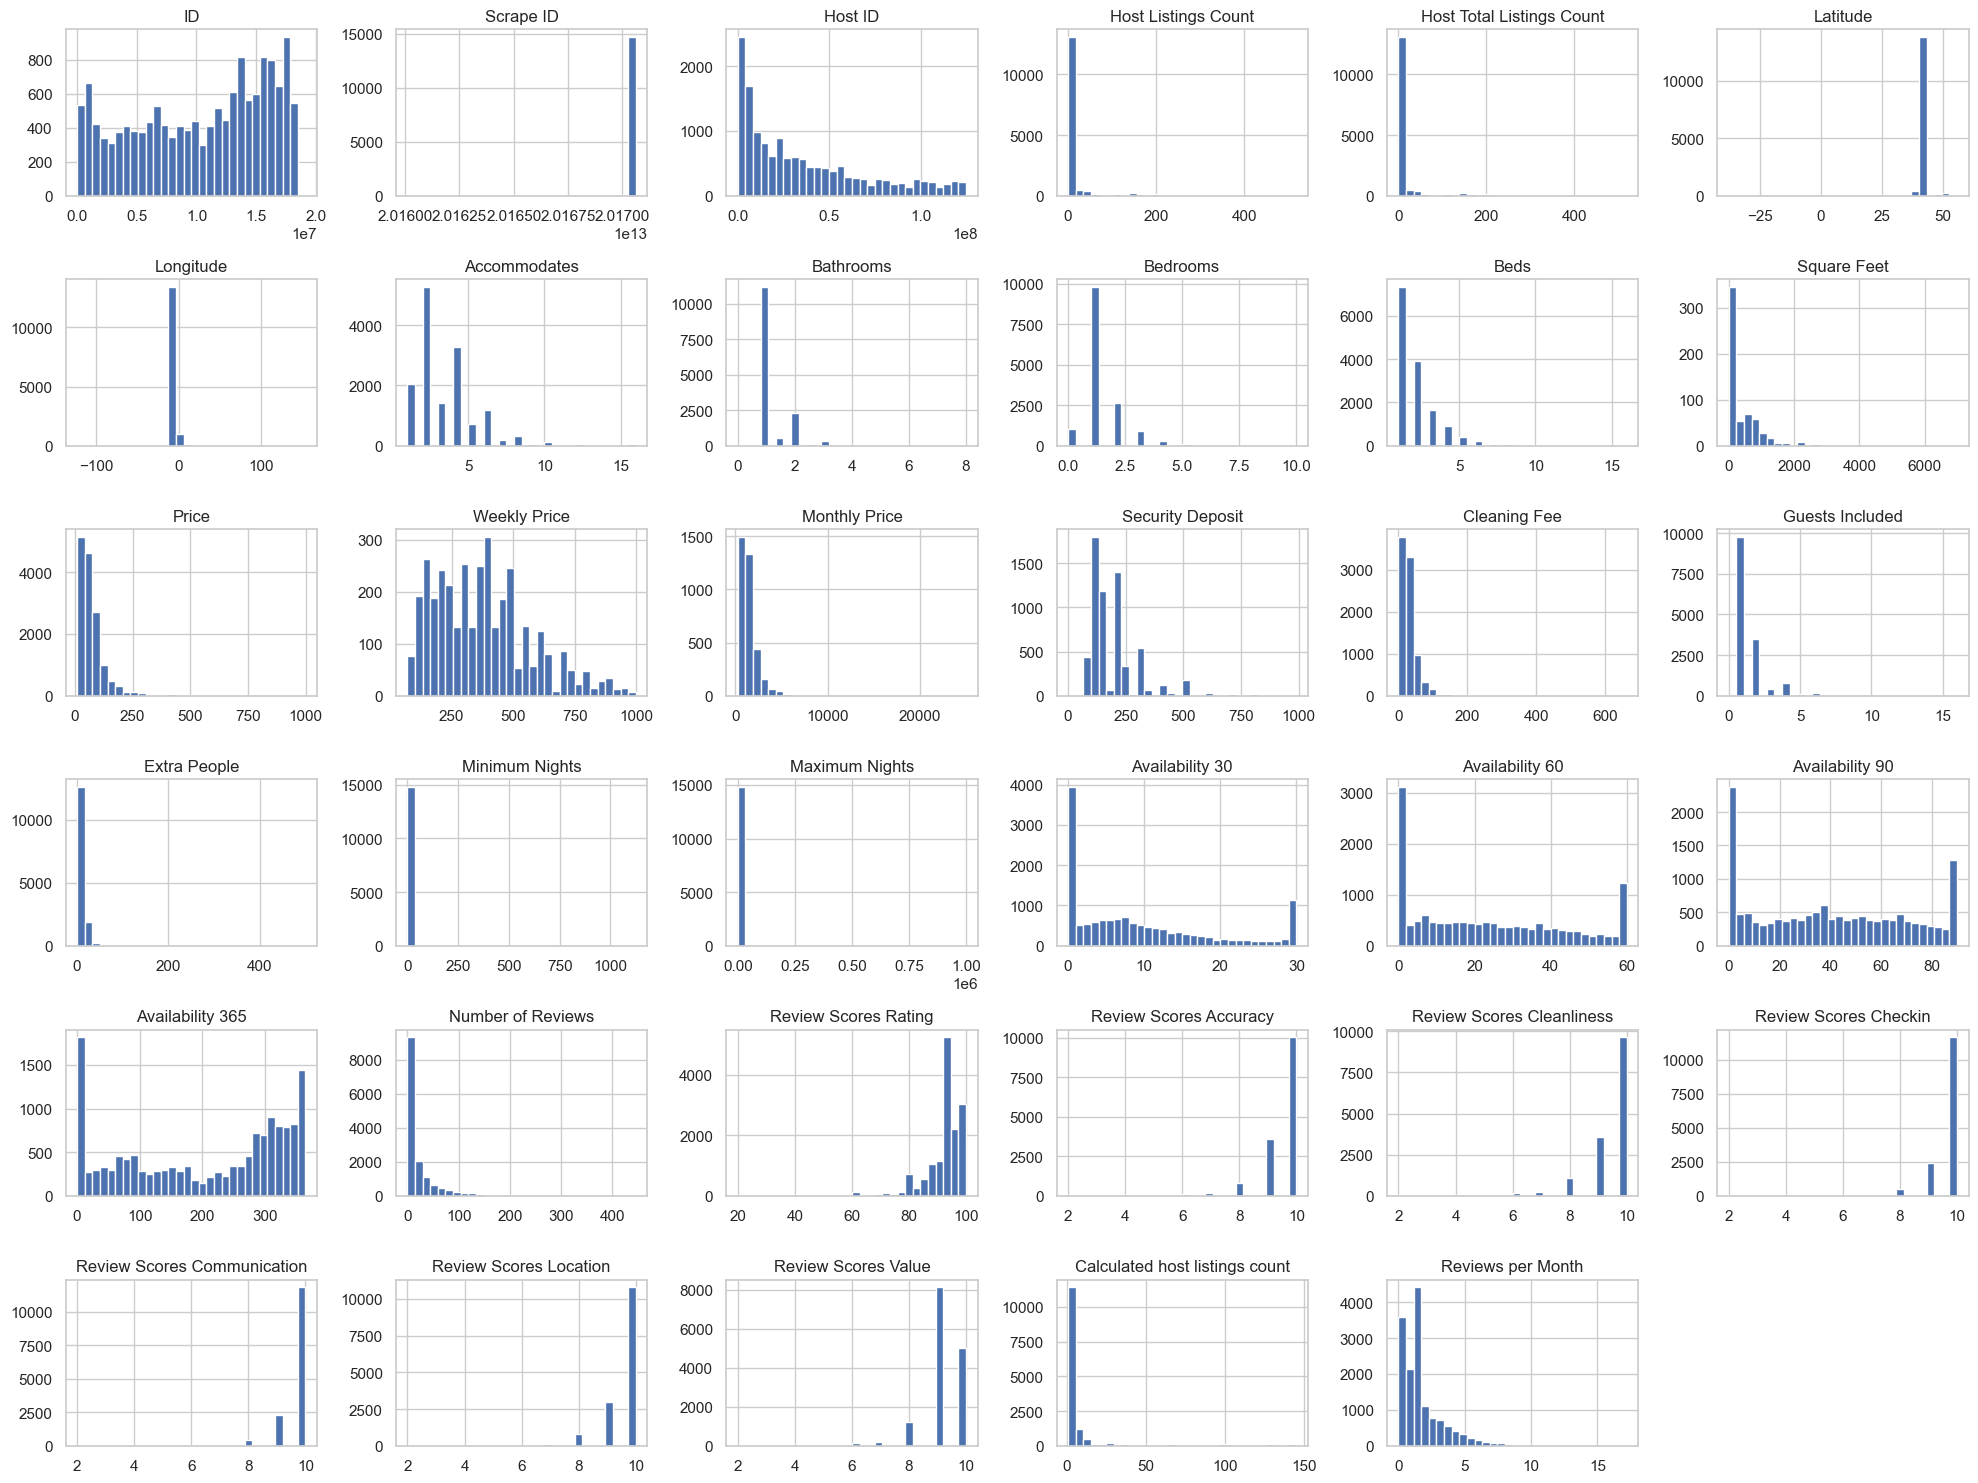

In [77]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(figsize=(20,15), bins=30)
plt.tight_layout()
plt.show()

1. Identificadores y metadatos de scraping
	•	ID, Scrape ID: se distribuyen de forma casi uniforme y secuencial. No aportan información predictiva y pueden eliminarse o conservarse solo para trazabilidad.

2. Información del anfitrión
	•	Host ID: fuerte sesgo a la izquierda. La mayoría de los hosts (casi 80 %) gestionan un solo anuncio; unos pocos gestionan decenas o más.
	•	Host Response Rate: pico enorme en 100 %. Muchos hosts responden siempre, y hay valores faltantes que conviene imputar (por ejemplo, como 0 % o 100 %).
	•	Host Listings Count & Host Total Listings Count: distribución muy similar e igualmente muy sesgada: la mayoría con 1–2 anuncios, pocos con >10.

3. Ubicación
	•	Latitude & Longitude: valores concentrados en un rango muy estrecho (la ciudad o región de enfoque). Hay algunos valores atípicos en 0 o fuera de rango que probablemente deben descartarse o corregirse.

4. Características físicas de la propiedad
	•	Accommodates: la gran mayoría de alojamientos para 2–4 personas, con muy pocos extremos (>10).
	•	Bathrooms, Bedrooms, Beds: casi todos tienen 1 baño, 1–2 habitaciones y 1–3 camas. Pocos casos con múltiples habitaciones o baños.
	•	Square Feet: mayoría de propiedades pequeñas (<1 000 ft²), con algunos valores muy altos (>3 000) o inexistentes (nulos).

5. Precios y tarifas
	•	Price: distribución muy sesgada a la derecha; la mayoría de precios cae por debajo de 200 USD, con una larga cola de precios altos que deberemos transformar (log).
	•	Weekly Price: patrón más uniforme entre 200–600 USD, pero también con muchos nulos (propiedades sin tarifa semanal).
	•	Monthly Price: similar a weekly, pero con una cola aún más larga en valores altos.
	•	Security Deposit & Cleaning Fee: gran proporción en 0 USD (sin depósito o sin tarifa de limpieza), y luego unos pocos montos que varían 50–200 USD.
	•	Extra People: cargo adicional mayoritariamente un valor fijo bajo (<20 USD).

6. Reglas de reserva
	•	Minimum Nights: pico clarísimo en 1 noche; casi ningún anuncio exige más de 3 noches.
	•	Maximum Nights: distribuciones extremas (muchos con máximo 1125, etc.) que reflejan configuraciones por defecto y probablemente no útiles.

7. Disponibilidad
	•	Availability 30/60/90/365:
	•	A 30 días: muchos con 0 (no disponible) y un bloque uniforme entre 1–30.
	•	A 365 días: tendencia creciente hacia 365 (todo el año abierto) con muchos anuncios totalmente disponibles y otro grupo cerrado.
	•	Estos patrones indican calendarios muy dispares entre anfitriones.

8. Reseñas y puntuaciones
	•	Number of Reviews: fuerte sesgo a la izquierda; la mayoría sin reseñas o con muy pocas (<10).
	•	Review Scores (Rating, Accuracy, Cleanliness, Checkin, Communication, Location, Value):
	•	Concentración altísima en 9–10 (anfitriones tienden a puntuar muy bien).
	•	Pocos valores bajos (2–5), lo cual puede requerir agrupar puntajes topados.
	•	Reviews per Month: muchos con 0 y una cola de unos pocos anfitriones muy activos (>10 reseñas/mes).

⸻


➔ Implicaciones para el modelado
	1.	Eliminar o transformar identificadores (ID, Scrape ID).
	2.	Imputar o limpiar valores faltantes en respuesta del host y tarifas (weekly/monthly).
	3.	Reducir colinealidad (por ejemplo, host_listings_count y calculated_host_listings_count son casi iguales).
	4.	Transformar variables sesgadas, especialmente precios (log(price+1)), square footage y reviews per month.
	5.	Flaggear o eliminar outliers detectados en precios extremos o reglas de reserva anómalas.
	6.	Considerar agrupar o binarizar puntuaciones muy topadas (9–10) para mayor variabilidad.

In [27]:
# Solo variables numéricas
numeric_df = df.select_dtypes(include=[np.number]).copy()

# Calculamos Z-scores
z_scores = numeric_df.apply(zscore)

# Marcamos como outlier todo valor con |z| > 3
outlier_z = (z_scores.abs() > 3)
outlier_counts_z = outlier_z.sum().sort_values(ascending=False)

print("Outliers detectados por Z-score (|z| > 3):")
display(outlier_counts_z[outlier_counts_z > 0])

# Creamos una columna binaria de flag global (si la fila tiene cualquier outlier)
df['anomaly_zscore'] = outlier_z.any(axis=1)
print("\nPorcentaje de filas anotadas como anomalías (Z-score):",
      df['anomaly_zscore'].mean() * 100, "%")

Outliers detectados por Z-score (|z| > 3):


Number of Reviews    350
Accommodates         262
Guests Included      261
Longitude            253
Extra People         127
Latitude              74
Scrape ID             49
Minimum Nights        39
Maximum Nights         7
dtype: int64


Porcentaje de filas anotadas como anomalías (Z-score): 7.848443843031124 %


El hecho de que el 7.85 % de las filas hayan sido marcadas como anomalías (con |z|>3 en al menos una variable numérica) nos dice varias cosas:
	
    1.	Proporción de casos extremos
    Unos 1 160 registros (7.85 % de ~14 780) contienen al menos un valor que se aleja más de 3 desviaciones estándar de la media en alguna de las columnas numéricas. Esta es una fracción relativamente 
    alta, lo que sugiere que tu dataset tiene bastantes casos atípicos que conviene revisar.
	
    2.	Variables más problemáticas
Las que más outliers aportan son (en orden):
	-	Number of Reviews (350 filas)
	-	Accommodates (262)
	-	Guests Included (261)
	-	Longitude (253)
	-	Extra People (127)

Esto te indica en qué columnas concentrarte primero: por ejemplo, revisa valores de Number of Reviews muy altos (¿anfitriones superactivos o errores de scraping?), o Accommodates con números irreales (>10–12).

	3.	¿Qué hacer con estos registros?
	-	Eliminar las filas que contengan outliers en variables críticas (precio, número de huéspedes) si sospechas errores de captura.
	-	Winsorizar/Capping: limitar los valores extremos al percentil 1–99 para conservar la mayoría de datos sin distorsión de la media.
	-	Mantener y flaggear: guarda la columna anomaly_zscore como característica adicional para que el modelo aprenda que “esto es inusual”.

    4.	Comparación con otros métodos
Vacía el flag de Z-score junto con los de IQR e IsolationForest y compáralos. Quizá algunos puntos los detecta solo uno de los métodos, y querrás quedarte con la intersección (los más confiables) o con la unión si prefieres limpiar agresivamente.
	
    5.	Siguiente paso en el pipeline
	-	Decide umbrales concretos: p.ej. eliminar filas donde price, accommodates o number_of_reviews tengan |z|>4 (más estricto).
	-	Aplica tu limpieza en src/preprocessing.py para que sea reproducible.
	-	Guarda un dataset “sin outliers” en data/processed/airbnb_clean.csv y continua con la transformación de variables y split train/test.

Vamos a evaluar si los outliers son estadisticamente significativos:


    Implementación del test de Grubbs para detectar outliers.
    
    Parámetros:
    data (array-like): Datos a analizar
    alpha (float): Nivel de significancia (por defecto 0.05)
    
    Retorna:
    outlier_index (int): Índice del outlier (o None si no se encuentra)
    is_outlier (bool): True si se detectó un outlier estadísticamente significativo
    G (float): Estadístico de prueba
    G_critical (float): Valor crítico


In [75]:
def test_grubbs(data, alpha=0.05):
    data = np.array(data)
    # Eliminamos NaNs
    data = data[~np.isnan(data)]
    n = len(data)
    
    if n < 3:
        return None, False, np.nan, np.nan
    
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # ddof=1 para estimación insesgada
    
    if std == 0:
        return None, False, np.nan, np.nan
    
    # Calculamos las desviaciones absolutas
    abs_dev = np.abs(data - mean)
    
    # Encontramos el valor más extremo y su índice
    max_dev_index = np.argmax(abs_dev)
    max_dev = abs_dev[max_dev_index]
    
    # Calculamos el estadístico G
    G = max_dev / std
    
    # Valor crítico para el test de Grubbs
    t_critical = stats.t.ppf(1 - alpha / (2 * n), n - 2)
    G_critical = ((n - 1) * t_critical) / np.sqrt(n * (n - 2 + t_critical**2))
    
    is_outlier = G > G_critical
    
    return max_dev_index, is_outlier, G, G_critical

# Aplicar el test de Grubbs a cada columna numérica del DataFrame
def aplicar_grubbs_al_dataframe(df, alpha=0.05):
    """
    Aplica el test de Grubbs a todas las columnas numéricas del DataFrame
    y retorna un resumen de los resultados.
    """
    resultados = {}
    columnas_numericas = df.select_dtypes(include=[np.number]).columns
    
    for columna in columnas_numericas:
        data = df[columna].dropna()
        
        # Si la columna no tiene suficientes datos válidos, la saltamos
        if len(data) < 3:
            continue
        
        max_dev_index, is_outlier, G, G_critical = test_grubbs(data, alpha=alpha)
        
        if is_outlier and max_dev_index is not None:
            valor_outlier = data.iloc[max_dev_index]
            resultados[columna] = {
                'es_outlier': is_outlier,
                'estadistico_G': G,
                'valor_critico': G_critical,
                'valor_outlier': valor_outlier,
                'indice_outlier': data.index[max_dev_index]
            }
    
    return resultados

# Aplicar el test a tu dataframe
resultados_grubbs = aplicar_grubbs_al_dataframe(df_clean)

# Mostrar los resultados
print("Resultados del Test de Grubbs (alpha=0.05):")
print("="*50)
for columna, resultado in resultados_grubbs.items():
    print(f"Columna: {columna}")
    print(f"  - ¿Outlier significativo?: {'Sí' if resultado['es_outlier'] else 'No'}")
    print(f"  - Estadístico G: {resultado['estadistico_G']:.4f} (Valor crítico: {resultado['valor_critico']:.4f})")
    print(f"  - Valor del outlier: {resultado['valor_outlier']}")
    print("-"*40)

# También puedes identificar cuántos outliers hay según el test de Grubbs
print(f"\nTotal de columnas con outliers significativos: {len(resultados_grubbs)}")

Resultados del Test de Grubbs (alpha=0.05):
Columna: Scrape ID
  - ¿Outlier significativo?: Sí
  - Estadístico G: 12.6208 (Valor crítico: 4.6438)
  - Valor del outlier: -0.6646135160828678
----------------------------------------
Columna: Host ID
  - ¿Outlier significativo?: Sí
  - Estadístico G: 18.4491 (Valor crítico: 4.5659)
  - Valor del outlier: -8.79095615653262
----------------------------------------
Columna: Latitude
  - ¿Outlier significativo?: Sí
  - Estadístico G: 15.6887 (Valor crítico: 4.6413)
  - Valor del outlier: -6.43864391457377
----------------------------------------
Columna: Longitude
  - ¿Outlier significativo?: Sí
  - Estadístico G: 11.1328 (Valor crítico: 4.6445)
  - Valor del outlier: 11.13312773992772
----------------------------------------
Columna: Bedrooms
  - ¿Outlier significativo?: Sí
  - Estadístico G: 4.7581 (Valor crítico: 4.6445)
  - Valor del outlier: 4.758245895756574
----------------------------------------
Columna: Maximum Nights
  - ¿Outlier si

Variables de identificación (Scrape ID, Host ID):

Estos outliers probablemente no afectan el análisis estadístico de tu estudio
Recomendación: Mantenerlos, pero considerar excluir estas columnas del modelado predictivo


Coordenadas geográficas (Latitude, Longitude):

Los outliers podrían representar ubicaciones reales pero inusuales
Recomendación: Realizar un análisis geoespacial para verificar si son errores o ubicaciones válidas


Características de la propiedad (Bedrooms):

El valor de 4.76 para Bedrooms parece ser un valor válido (posiblemente 5 habitaciones)
Recomendación: Mantener, ya que probablemente representa propiedades reales de lujo


Maximum Nights:

El valor negativo (-4.65) no tiene sentido en este contexto
Recomendación: Corregir/imputar este valor, ya que parece ser un error


Review Scores Rating:

El valor de 5.05 podría estar fuera de escala si las calificaciones son de 1-5
Recomendación: Verificar la escala y corregir si está fuera de rango

Corrección para Maximum Nights (valor negativo: -4.6489)

In [79]:
df_clean = df.copy()          # Copia post-análisis, sin modificar
df_limpio = df_clean.copy()   # Sobre esta se harán correcciones

In [80]:
df_limpio.drop(columns=['Scrape ID', 'Host ID'], inplace=True)

In [81]:
df_limpio

,ID,Listing Url,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,anomaly_zscore,anomaly_iqr
0,11210388,https://www.airbnb.com/rooms/11210388,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,missing,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id...",True,True
1,17471131,https://www.airbnb.com/rooms/17471131,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain",ES,Spain,41.389683,2.172

In [84]:
pd.set_option('display.max_rows', 100)  # o más si necesitas
df_limpio.dtypes.sort_values()

anomaly_iqr                          bool
anomaly_zscore                       bool
Number of Reviews                   int64
Availability 365                    int64
Availability 90                     int64
Availability 60                     int64
Availability 30                     int64
Maximum Nights                      int64
Minimum Nights                      int64
Extra People                        int64
Guests Included                     int64
Accommodates                        int64
ID                                  int64
Beds                              float64
Bedrooms                          float64
Square Feet                       float64
Price                             float64
Weekly Price                      float64
Monthly Price                     float64
Security Deposit                  float64
Cleaning Fee                      float64
Bathrooms                         float64
Review Scores Rating              float64
Review Scores Cleanliness         

In [94]:
columnas_convertibles = [
    'Beds', 'Bedrooms', 'Square Feet',
    'Host Listings Count', 'Host Total Listings Count',
    'Calculated host listings count'
]

# Convierte solo si no hay decimales en los datos
for col in columnas_convertibles:
    if (df_limpio[col].dropna() % 1 == 0).all():
        df_limpio[col] = df_limpio[col].astype('Int64')
    else:
        print(f"[⚠️] {col} tiene valores con decimales y no fue convertido.")

In [95]:
def resumen_tipos_columnas(df):
    """
    Muestra:
    - Cantidad de columnas por tipo de dato
    - Tabla con cada columna y su tipo (ordenada alfabéticamente por tipo)
    """
    # Convertimos los tipos a string para evitar errores al ordenar
    tipos = df.dtypes.astype(str)

    # Resumen de cantidad por tipo
    resumen = tipos.value_counts().reset_index()
    resumen.columns = ['Tipo de dato', 'Cantidad']

    print(" Resumen de tipos de columnas:")
    print(resumen.to_string(index=False))

    print("\n Detalle de columnas por tipo:")
    print(tipos.sort_values().to_string())

In [96]:
resumen_tipos_columnas(df_limpio)

 Resumen de tipos de columnas:
Tipo de dato  Cantidad
      object        54
     float64        16
       int64        11
       Int64         6
        bool         2

 Detalle de columnas por tipo:
Host Listings Count                 Int64
Calculated host listings count      Int64
Bedrooms                            Int64
Beds                                Int64
Square Feet                         Int64
Host Total Listings Count           Int64
anomaly_zscore                       bool
anomaly_iqr                          bool
Review Scores Accuracy            float64
Review Scores Rating              float64
Cleaning Fee                      float64
Review Scores Checkin             float64
Monthly Price                     float64
Weekly Price                      float64
Price                             float64
Review Scores Communication       float64
Review Scores Location            float64
Review Scores Value               float64
Bathrooms                         float64
R

Valores nulos (NaN) por columna

In [97]:
# 1. Conteo de NaN por columna en df_limpio
nan_count = df_limpio.isna().sum()

# 2. Porcentaje de NaN por columna
nan_percent = nan_count / len(df_limpio) * 100

# 3. Resumen en DataFrame ordenado
nan_summary = pd.DataFrame({
    'nan_count': nan_count,
    'nan_percent': nan_percent
}).sort_values('nan_count', ascending=False)

# 4. Mostrar solo las columnas con al menos un NaN
print("🧼 Columnas con valores nulos en df_limpio:")
display(nan_summary[nan_summary['nan_count'] > 0])

🧼 Columnas con valores nulos en df_limpio:


,nan_count,nan_percent
Has Availability,14768,99.918809
Host Acceptance Rate,14741,99.736130
Jurisdiction Names,14553,98.464141
License,14431,97.638701
Square Feet,14182,95.953992
Monthly Price,11219,75.906631
Weekly Price,11190,75.710419
Notes,9136,61.813261
Security Deposit,8524,57.672530
Interaction,6552,44.330176


Eliminar columnas con > 50 % de nulos

Estas variables aportan muy poca información porque están vacías en más de la mitad de los registros. 

In [98]:
# Lista de columnas a eliminar
cols_drop = [
    'Has Availability', 'Host Acceptance Rate', 'Jurisdiction Names', 'License',
    'Square Feet', 'Monthly Price', 'Weekly Price', 'Notes', 'Security Deposit',
    'Interaction', 'Access', 'Cleaning Fee', 'Transit', 'Neighborhood Overview',
    'Host About', 'Neighbourhood', 'House Rules', 'Space', 'Host Neighbourhood'
]

# Eliminar columnas directamente en df_limpio
df_limpio.drop(columns=cols_drop, inplace=True)

# Verificar dimensiones
print("Shape df original:", df.shape)
print("Shape df_limpio:", df_limpio.shape)

Shape df original: (14780, 91)
Shape df_limpio: (14780, 70)


In [99]:
# 1. Conteo de NaN por columna en df_limpio
nan_count = df_limpio.isna().sum()

# 2. Porcentaje de NaN por columna
nan_percent = nan_count / len(df_limpio) * 100

# 3. Resumen en DataFrame ordenado
nan_summary = pd.DataFrame({
    'nan_count': nan_count,
    'nan_percent': nan_percent
}).sort_values('nan_count', ascending=False)

# 4. Mostrar solo las columnas con al menos un NaN
print("🧼 Columnas con valores nulos en df_limpio:")
display(nan_summary[nan_summary['nan_count'] > 0])

🧼 Columnas con valores nulos en df_limpio:


,nan_count,nan_percent
Last Review,3163,21.400541
First Review,3162,21.393775
Thumbnail Url,2820,19.079838
XL Picture Url,2820,19.079838
Medium Url,2820,19.079838
Zipcode,506,3.423545
Amenities,170,1.150203
State,144,0.974290
Market,57,0.385656
Host Location,43,0.290934


In [100]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Numéricas → mediana
num_cols = [
    'Review Scores Value','Review Scores Location','Review Scores Checkin',
    'Review Scores Accuracy','Review Scores Cleanliness','Review Scores Communication',
    'Review Scores Rating','Reviews per Month','Bathrooms','Beds','Bedrooms','Price',
    'Calculated host listings count','Host Listings Count','Host Total Listings Count'
]

# Fechas/texto de fecha → cadena "missing"
date_cols = ['Last Review','First Review','Host Since']

# URLs de imágenes → cadena "no_image"
url_cols = [
    'XL Picture Url','Medium Url','Thumbnail Url',
    'Picture Url','Host Thumbnail Url','Host Picture Url'
]

# Tasas / tiempos de respuesta → cadena "unknown"
rate_cols = ['Host Response Rate','Host Response Time']

# Texto libre o corto → cadena vacía
text_cols = [
    'Neighbourhood Group Cleansed','Summary','Zipcode','Amenities',
    'State','Market','Host Location','City','Name','Description',
    'Features','Host Verifications'
]

# — 2. Crea los imputadores —
imp_mediana = SimpleImputer(strategy='median')
imp_missing = SimpleImputer(strategy='constant', fill_value='missing')
imp_no_image = SimpleImputer(strategy='constant', fill_value='no_image')
imp_unknown = SimpleImputer(strategy='constant', fill_value='unknown')
imp_empty   = SimpleImputer(strategy='constant', fill_value='')

# — 3. Aplica la imputación sobre df_limpio —
df_limpio[num_cols]    = imp_mediana.fit_transform(df_limpio[num_cols])
df_limpio[date_cols]   = imp_missing.fit_transform(df_limpio[date_cols])
df_limpio[url_cols]    = imp_no_image.fit_transform(df_limpio[url_cols])
df_limpio[rate_cols]   = imp_unknown.fit_transform(df_limpio[rate_cols])
df_limpio[text_cols]   = imp_empty.fit_transform(df_limpio[text_cols])

# — 4. Verificación final —
nan_summary_post = pd.DataFrame({
    'nan_count':   df_limpio.isna().sum(),
    'nan_percent': df_limpio.isna().sum() / len(df_limpio) * 100
}).sort_values('nan_count', ascending=False)

print("🧼 Valores faltantes tras imputación:")
display(nan_summary_post[nan_summary_post.nan_count > 0])

🧼 Valores faltantes tras imputación:


,nan_count,nan_percent
Host Name,3,0.020298
Country,1,0.006766


In [101]:
df_limpio['Host Name'].fillna('unknown', inplace=True)
df_limpio['Country'].fillna(df_limpio['Country'].mode()[0], inplace=True)  # o 'Desconocido'

In [102]:
df_limpio.head(5)

,ID,Listing Url,Last Scraped,Name,Summary,Description,Experiences Offered,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host URL,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Thumbnail Url,Host Picture Url,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,anomaly_zscore,anomaly_iqr
0,11210388,https://www.airbnb.com/rooms/11210388,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,Loft in the Hill country 12-15 minutes directl...,none,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,within an hour,100.0,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",78733,missing,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",58.0,1,0,2,1125,today,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id...",True,True
1,17471131,https://www.airbnb.com/rooms/17471131,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",within an hour,100.0,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain",ES,Spain,41.389683,2.172625,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",70.0,2,44,1,1125,today,6,21,39,309,2017-04-08,1,2017-03-05,2017-03-05,80.0,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ...",False,True
2,17584891,https://www.airbnb.com/rooms/17584891,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,https://a0.muscache.com/im/pictures/fd4528f3-f...,https://a0.muscache.com/im/pictures/fd4528f3-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/fd4528f3-f...,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",within an hour,100.0,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08008, Spain",la Dreta de l'Eixample,Eixample,

### 📌 Mi decisión: eliminar columnas que no aportan al modelado

Antes de comenzar con la codificación de variables categóricas y construir modelos predictivos, decidí eliminar varias columnas que no aportan valor analítico o pueden introducir ruido en el entrenamiento. Aquí explico por qué:

#### 🟥 Identificadores únicos y URLs
Eliminé columnas como `ID`, `Listing Url`, `Host URL`, `Host Name`, así como todas las URLs de imágenes (`Thumbnail Url`, `Picture Url`, etc.), porque son específicas de cada observación y no contienen patrones generalizables que un modelo pueda aprender.

#### 📆 Fechas sin procesar
También eliminé `Last Scraped` y `Calendar last Scraped`, ya que no planeo hacer ingeniería de variables de tiempo a partir de ellas por ahora.

#### 🧾 Texto libre no estructurado
Columnas como `Summary`, `Description` y `Experiences Offered` pueden contener información útil, pero requieren procesamiento de lenguaje natural. Como no lo voy a aplicar en esta etapa, preferí descartarlas.

#### 🌍 Información geográfica redundante
`Smart Location`, `Geolocation` y `Street` están duplicadas o son menos limpias que otras como `Latitude`, `Longitude`, `City` y `Zipcode`, así que también las removí.

Esto me deja con un dataset más limpio, más fácil de codificar y modelar, sin columnas irrelevantes o de difícil tratamiento.

In [103]:
cols_irrelevantes = [
    'ID', 'Listing Url', 'Host URL', 'Host Name',
    'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host Picture Url', 'Host Thumbnail Url',
    'Last Scraped', 'Calendar last Scraped',
    'Summary', 'Description', 'Experiences Offered',
    'Smart Location', 'Geolocation', 'Street'
]

df_limpio.drop(columns=[col for col in cols_irrelevantes if col in df_limpio.columns], inplace=True)

print(f" Columnas eliminadas: {len(cols_irrelevantes)}")
print(f" Shape final del df_limpio: {df_limpio.shape}")

 Columnas eliminadas: 18
 Shape final del df_limpio: (14780, 52)


In [104]:
df_limpio.head(5)

,Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features,anomaly_zscore,anomaly_iqr
0,The Loft-Full Bath-Deck w/View,2016-02-11,My father was USAF so I was born at Offutt AFB...,within an hour,100.0,1.0,1.0,"email,phone,reviews,kba",78733,missing,Austin,TX,78733,Austin,US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",58.0,1,0,2,1125,today,10,34,64,281,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50,"Host Is Superhost,Host Has Profile Pic,Host Id...",True,True
1,"Claris I, Friendly Rentals",2016-11-08,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,ES,Spain,41.389683,2.172625,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",70.0,2,44,1,1125,today,6,21,39,309,1,2017-03-05,2017-03-05,80.0,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"Host Has Profile Pic,Requires License,Instant ...",False,True
2,"Style Terrace Red, Friendly Rentals",2016-11-08,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08008,Barcelona,ES,Spain,41.393035,2.162173,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",70.0,2,42,1,1125,today,7,21,42,291,0,missing,missing,94.0,10.0,10.0,10.0,10.0,10.0,9.0,super_strict_30,106.0,1.20,"Host Has Profile Pic,Requires License,Instant ...",False,True
3,Picasso Suite 1.4 Paseo de Gracia,2010-05-25,"Barcelona, Cataluña, Spain",within an hour,100.0,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08009,Barcelona,ES,Spain,41.396967,2.167418,Apartment,Entire home/apt,8,2.0,3.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",229.0,2,39,2,1125,today,11,24,47,316,13,2016-04-17,2017-03-02,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09,"Host Has Profile Pic,Host Identity Verified,Re...",False,True
4,Smart City Centre Apartment II,2016-01-12,"Madrid, Community of Madrid, Spain",within an hour,99.0,207.0,207.0,"email,phone,reviews,jumio",l'Antiga Esquerra de l'Eixample,Eixample,Barcelona,Catalunya,08036,Barcelona,ES,Spain,41.388685,2.155150,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",149.0,1,0,2,1125,today,0,0,0,7,0,missing,missing,94.0,10.0,10.0,10.0,10.0,10.0,9.0,flexible,92.0,1.20,"Host Has Profile Pic,Host Identity Verified,Is...",False,True


In [105]:
df_limpio.drop(columns=['anomaly_zscore', 'anomaly_iqr'], inplace=True, errors='ignore')

In [106]:
df_limpio.head(5)

,Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,The Loft-Full Bath-Deck w/View,2016-02-11,My father was USAF so I was born at Offutt AFB...,within an hour,100.0,1.0,1.0,"email,phone,reviews,kba",78733,missing,Austin,TX,78733,Austin,US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",58.0,1,0,2,1125,today,10,34,64,281,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50,"Host Is Superhost,Host Has Profile Pic,Host Id..."
1,"Claris I, Friendly Rentals",2016-11-08,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,ES,Spain,41.389683,2.172625,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",70.0,2,44,1,1125,today,6,21,39,309,1,2017-03-05,2017-03-05,80.0,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"Host Has Profile Pic,Requires License,Instant ..."
2,"Style Terrace Red, Friendly Rentals",2016-11-08,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08008,Barcelona,ES,Spain,41.393035,2.162173,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",70.0,2,42,1,1125,today,7,21,42,291,0,missing,missing,94.0,10.0,10.0,10.0,10.0,10.0,9.0,super_strict_30,106.0,1.20,"Host Has Profile Pic,Requires License,Instant ..."
3,Picasso Suite 1.4 Paseo de Gracia,2010-05-25,"Barcelona, Cataluña, Spain",within an hour,100.0,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08009,Barcelona,ES,Spain,41.396967,2.167418,Apartment,Entire home/apt,8,2.0,3.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",229.0,2,39,2,1125,today,11,24,47,316,13,2016-04-17,2017-03-02,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09,"Host Has Profile Pic,Host Identity Verified,Re..."
4,Smart City Centre Apartment II,2016-01-12,"Madrid, Community of Madrid, Spain",within an hour,99.0,207.0,207.0,"email,phone,reviews,jumio",l'Antiga Esquerra de l'Eixample,Eixample,Barcelona,Catalunya,08036,Barcelona,ES,Spain,41.388685,2.155150,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",149.0,1,0,2,1125,today,0,0,0,7,0,missing,missing,94.0,10.0,10.0,10.0,10.0,10.0,9.0,flexible,92.0,1.20,"Host Has Profile Pic,Host Identity Verified,Is..."


In [ ]:
### 🗓️ Transformación de fechas a antigüedad

# Quiero transformar las fechas que actualmente están en formato string en nuevas variables numéricas que representen "antigüedad" en días o años. 
# Esto es útil porque los modelos no entienden fechas como tal, pero sí pueden interpretar cuán antiguo es un anuncio o un host.
# Para esto, usaré la fecha más reciente del dataset como referencia (fecha máxima encontrada).

In [118]:
# Convertir a datetime
df_limpio['Host Since'] = pd.to_datetime(df_limpio['Host Since'], errors='coerce')
df_limpio['First Review'] = pd.to_datetime(df_limpio['First Review'], errors='coerce')
df_limpio['Last Review'] = pd.to_datetime(df_limpio['Last Review'], errors='coerce')

# Establecer la fecha de referencia como la más reciente del dataset
fecha_referencia = df_limpio[['Host Since', 'First Review', 'Last Review']].max().max()

# Calcular antigüedad en días
df_limpio['host_age_days'] = (fecha_referencia - df_limpio['Host Since']).dt.days
df_limpio['days_since_first_review'] = (fecha_referencia - df_limpio['First Review']).dt.days
df_limpio['days_since_last_review'] = (fecha_referencia - df_limpio['Last Review']).dt.days

# Opcional: transformar a años para mayor legibilidad
df_limpio['host_age_years'] = df_limpio['host_age_days'] / 365.25
df_limpio['review_gap_years'] = (df_limpio['days_since_first_review'] - df_limpio['days_since_last_review']) / 365.25

# Eliminar columnas originales si ya no las usaré directamente
df_limpio.drop(columns=['Host Since', 'First Review', 'Last Review'], inplace=True)

print("✅ Nuevas columnas de antigüedad creadas:")
print(df_limpio[['host_age_years', 'days_since_last_review', 'review_gap_years']].head())

✅ Nuevas columnas de antigüedad creadas:
   host_age_years  days_since_last_review  review_gap_years
0        1.336071                   107.0          0.958248
1        0.594114                   100.0          0.000000
2        0.594114                     NaN               NaN
3        7.052704                   103.0          0.873374
4        1.418207                     NaN               NaN


In [119]:
df_limpio.head(5)

,Name,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Host Verifications,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features,host_age_days,days_since_first_review,days_since_last_review,host_age_years,review_gap_years
0,The Loft-Full Bath-Deck w/View,My father was USAF so I was born at Offutt AFB...,within an hour,100.0,1.0,1.0,"email,phone,reviews,kba",78733,missing,Austin,TX,78733,Austin,US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",58.0,1,0,2,1125,today,10,34,64,281,42,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50,"Host Is Superhost,Host Has Profile Pic,Host Id...",488.0,457.0,107.0,1.336071,0.958248
1,"Claris I, Friendly Rentals","Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,ES,Spain,41.389683,2.172625,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",70.0,2,44,1,1125,today,6,21,39,309,1,80.0,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"Host Has Profile Pic,Requires License,Instant ...",217.0,100.0,100.0,0.594114,0.000000
2,"Style Terrace Red, Friendly Rentals","Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,"email,phone,reviews,work_email",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08008,Barcelona,ES,Spain,41.393035,2.162173,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",70.0,2,42,1,1125,today,7,21,42,291,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,super_strict_30,106.0,1.20,"Host Has Profile Pic,Requires License,Instant ...",217.0,NaN,NaN,0.594114,NaN
3,Picasso Suite 1.4 Paseo de Gracia,"Barcelona, Cataluña, Spain",within an hour,100.0,27.0,27.0,"email,phone,facebook,reviews,manual_offline,ju...",la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08009,Barcelona,ES,Spain,41.396967,2.167418,Apartment,Entire home/apt,8,2.0,3.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",229.0,2,39,2,1125,today,11,24,47,316,13,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09,"Host Has Profile Pic,Host Identity Verified,Re...",2576.0,422.0,103.0,7.052704,0.873374
4,Smart City Centre Apartment II,"Madrid, Community of Madrid, Spain",within an hour,99.0,207.0,207.0,"email,phone,reviews,jumio",l'Antiga Esquerra de l'Eixample,Eixample,Barcelona,Catalunya,08036,Barcelona,ES,Spain,41.388685,2.155150,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",149.0,1,0,2,1125,today,0,0,0,7,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,flexible,92.0,1.20,"Host Has Profile Pic,Host Identity Verified,Is...",518.0,NaN,NaN,1.418207,NaN


Detectando valores nulos

In [153]:
df_limpio.isna().sum().sort_values(ascending=False)

review_gap_years                  3163
days_since_last_review            3163
days_since_first_review           3162
host_age_years                       3
host_age_days                        3
Name                                 0
Review Scores Cleanliness            0
Calendar Updated                     0
Availability 30                      0
Availability 60                      0
Availability 90                      0
Availability 365                     0
Number of Reviews                    0
Review Scores Rating                 0
Review Scores Accuracy               0
Review Scores Location               0
Review Scores Checkin                0
Review Scores Communication          0
Host Location                        0
Review Scores Value                  0
Cancellation Policy                  0
Calculated host listings count       0
Reviews per Month                    0
Features                             0
n_amenities                          0
Maximum Nights           

In [154]:
df_limpio['days_since_first_review'].fillna(-1, inplace=True)
df_limpio['days_since_last_review'].fillna(-1, inplace=True)
df_limpio['review_gap_years'].fillna(-1, inplace=True)
df_limpio['host_age_years'].fillna(df_limpio['host_age_years'].median(), inplace=True)

Aunque detecté valores nulos en variables como `days_since_first_review` y `host_age_years`, decidí **no eliminar estas filas** por varias razones:

- Los `NaN` se deben principalmente a **anuncios sin reseñas o sin fecha de registro del host**.
- Estos anuncios **existen y podrían recibir reservas en el futuro**, por lo que su análisis sigue siendo relevante.
- Eliminar estas filas significaría **perder más del 20% del dataset**, lo cual puede afectar la generalización del modelo.
- En lugar de eliminarlos, imputé los valores faltantes con:
  - `-1` en columnas de reseñas, para marcar explícitamente que no tienen historial.
  - La mediana para `host_age_years`, ya que es una variable numérica continua y esperada por el modelo.

Esta estrategia me permite conservar el máximo de información sin introducir ruido arbitrario.

In [159]:
df_limpio.isna().sum().sort_values(ascending=False)

Name                              0
Review Scores Communication       0
Calendar Updated                  0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Location            0
Minimum Nights                    0
Review Scores Value               0
Cancellation Policy               0
Calculated host listings count    0
Reviews per Month                 0
Features                          0
days_since_first_review           0
days_since_last_review            0
host_age_years                    0
review_gap_years                  0
n_amenities                       0
Maximum Nights                    0
Extra People                      0
Host Location                     0
Country Code                

In [ ]:
df_limpio.drop(columns='host_age_days', inplace=True)
print("Columna 'host_age_days' eliminada.")

Después de imputar correctamente `host_age_years` y las variables derivadas de reviews, confirmé que `host_age_days` era redundante.
Decidí eliminarla para mantener el dataset limpio, sin duplicaciones ni variables innecesarias.
Ahora `df_limpio` está completamente libre de valores nulos y listo para continuar con el flujo de codificación, escalado y modelado.

In [161]:
df_limpio.isna().sum().sort_values(ascending=False)

Name                              0
Review Scores Communication       0
Calendar Updated                  0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Location            0
Minimum Nights                    0
Review Scores Value               0
Cancellation Policy               0
Calculated host listings count    0
Reviews per Month                 0
Features                          0
days_since_first_review           0
days_since_last_review            0
host_age_years                    0
review_gap_years                  0
n_amenities                       0
Maximum Nights                    0
Extra People                      0
Host Location                     0
Country Code                

### Extracción de información desde listas tipo texto

Algunas columnas como 'Amenities' y 'Host Verifications' son listas separadas por comas.
No voy a explotar todos los valores posibles ahora, pero sí quiero generar variables más simples y potentes:
 - `n_amenities`: cuántas amenidades tiene el anuncio
- `n_verifications`: cuántos métodos de verificación tiene el anfitrión
Esto puede reflejar profesionalismo o nivel de servicio del host.

In [163]:
# Primero me aseguro de que los valores sean string
df_limpio['Amenities'] = df_limpio['Amenities'].astype(str)
df_limpio['Host Verifications'] = df_limpio['Host Verifications'].astype(str)

# Crear variables de conteo
df_limpio['n_amenities'] = df_limpio['Amenities'].apply(lambda x: len(x.split(',')) if x.strip() != '' else 0)
df_limpio['n_verifications'] = df_limpio['Host Verifications'].apply(lambda x: len(x.split(',')) if x.strip() != '' else 0)

# Revisar las nuevas variables
print(" Variables de conteo creadas:")
print(df_limpio[['n_amenities', 'n_verifications']].describe())

# Eliminar las columnas originales si no las usaré
df_limpio.drop(columns=['Amenities', 'Host Verifications'], inplace=True)

KeyError: 'Amenities'

In [164]:
df_limpio.head(5)

,Name,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features,days_since_first_review,days_since_last_review,host_age_years,review_gap_years,n_amenities,n_verifications
0,The Loft-Full Bath-Deck w/View,My father was USAF so I was born at Offutt AFB...,within an hour,100.0,1.0,1.0,78733,missing,Austin,TX,78733,Austin,US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,58.0,1,0,2,1125,today,10,34,64,281,42,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50,"Host Is Superhost,Host Has Profile Pic,Host Id...",457.0,107.0,1.336071,0.958248,23,4
1,"Claris I, Friendly Rentals","Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,ES,Spain,41.389683,2.172625,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,44,1,1125,today,6,21,39,309,1,80.0,8.0,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"Host Has Profile Pic,Requires License,Instant ...",100.0,100.0,0.594114,0.000000,7,4
2,"Style Terrace Red, Friendly Rentals","Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08008,Barcelona,ES,Spain,41.393035,2.162173,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,42,1,1125,today,7,21,42,291,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,super_strict_30,106.0,1.20,"Host Has Profile Pic,Requires License,Instant ...",-1.0,-1.0,0.594114,-1.000000,7,4
3,Picasso Suite 1.4 Paseo de Gracia,"Barcelona, Cataluña, Spain",within an hour,100.0,27.0,27.0,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08009,Barcelona,ES,Spain,41.396967,2.167418,Apartment,Entire home/apt,8,2.0,3.0,4.0,Real Bed,229.0,2,39,2,1125,today,11,24,47,316,13,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09,"Host Has Profile Pic,Host Identity Verified,Re...",422.0,103.0,7.052704,0.873374,24,7
4,Smart City Centre Apartment II,"Madrid, Community of Madrid, Spain",within an hour,99.0,207.0,207.0,l'Antiga Esquerra de l'Eixample,Eixample,Barcelona,Catalunya,08036,Barcelona,ES,Spain,41.388685,2.155150,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,149.0,1,0,2,1125,today,0,0,0,7,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,flexible,92.0,1.20,"Host Has Profile Pic,Host Identity Verified,Is...",-1.0,-1.0,1.418207,-1.000000,12,4


### Revisión de columnas categóricas antes de codificarlas

Antes de aplicar codificación (One-Hot, Ordinal, etc.), quiero identificar todas las columnas categóricas en mi `df_limpio`, revisar cuántas categorías únicas tiene cada una y decidir cómo tratarlas.

Mi objetivo es:

1. Detectar columnas con pocas categorías para aplicar One-Hot Encoding directamente.
2. Marcar columnas con cardinalidad alta que podrían necesitar agrupamiento, limpieza o ser descartadas.
3. Entender si algunas columnas requieren transformación adicional (como fechas o listas separadas por comas).

Este paso es clave para evitar errores comunes como explosión de dimensionalidad o uso innecesario de texto irrelevante en el modelo.

In [165]:
# Paso 1: Detectar columnas categóricas
cat_cols = df_limpio.select_dtypes(include='object').columns.tolist()

# Paso 2: Contar categorías únicas por columna
cat_summary = pd.DataFrame({
    'columna': cat_cols,
    'n_unicos': [df_limpio[col].nunique() for col in cat_cols],
    'tipo_sugerido': ['One-Hot' if df_limpio[col].nunique() <= 10 else 'Agrupar/Descartar' for col in cat_cols]
})

# Paso 3: Ordenar por cardinalidad
cat_summary.sort_values('n_unicos', ascending=False, inplace=True)

# Mostrar resultados
print(" Revisión de columnas categóricas:")
display(cat_summary)

 Revisión de columnas categóricas:


,columna,n_unicos,tipo_sugerido
0,Name,14376,Agrupar/Descartar
8,Zipcode,620,Agrupar/Descartar
1,Host Location,569,Agrupar/Descartar
4,Neighbourhood Cleansed,478,Agrupar/Descartar
6,City,247,Agrupar/Descartar
7,State,103,Agrupar/Descartar
17,Features,89,Agrupar/Descartar
3,Host Response Rate,71,Agrupar/Descartar
15,Calendar Updated,57,Agrupar/Descartar
5,Neighbourhood Group Cleansed,50,Agrupar/Descartar


### Codificación y limpieza final de variables categóricas

En este paso decidí codificar únicamente las columnas categóricas que tienen pocas categorías y son relevantes para el modelo. Estas incluyen:

- `Room Type`
- `Bed Type`
- `Host Response Time`
- `Cancellation Policy`

Aplicar One-Hot Encoding a estas variables me permite convertirlas en variables numéricas binarias que el modelo puede interpretar, sin generar demasiadas columnas (evitando explosión dimensional).

Por otro lado, eliminé las columnas categóricas que tienen alta cardinalidad o contenido complejo (como `Features`, `Name`, `City`, `Host Location`, etc.) porque:
- No las voy a codificar por ahora.
- Muchas son texto libre o listas complejas que requerirían procesamiento adicional (NLP, top-N, embeddings).
- Algunas están duplicadas semánticamente (ej. `Country` vs `Country Code`, o `Zipcode` vs `City`).

Este paso deja mi dataset `df_encoded` completamente preparado para construir `df_model`, con variables numéricas limpias, codificadas y listas para transformación o entrenamiento.

In [167]:
### 🎯 Codificación y limpieza final de categóricas

# 1. One-Hot Encoding de las seleccionadas
df_encoded = pd.get_dummies(df_limpio, columns=one_hot_cols, drop_first=True)

# 2. Eliminar columnas categóricas no codificadas
df_encoded.drop(columns=[col for col in cols_to_drop if col in df_encoded.columns], inplace=True)

# 3. Verificar el resultado
print(f" Columnas eliminadas: {len(cols_to_drop)}")
print(f" Shape final de df_encoded: {df_encoded.shape}")

 Columnas eliminadas: 19
 Shape final de df_encoded: (14780, 50)


In [168]:
df_model.head(5)

,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,Room Type_Private room,Room Type_Shared room,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Host Response Time_missing,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,1.0,1.0,30.337361,-97.863277,2,1.0,1.0,1.0,58.0,1,0,2,1125,10,34,64,281,42,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3.50,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,162.0,162.0,41.389683,2.172625,4,1.0,1.0,1.0,70.0,2,44,1,1125,6,21,39,309,1,80.0,8.0,10.0,10.0,10.0,8.0,10.0,106.0,0.86,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,162.0,162.0,41.393035,2.162173,4,1.0,1.0,1.0,70.0,2,42,1,1125,7,21,42,291,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,106.0,1.20,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,27.0,27.0,41.396967,2.167418,8,2.0,3.0,4.0,229.0,2,39,2,1125,11,24,47,316,13,92.0,10.0,9.0,10.0,10.0,10.0,9.0,24.0,1.09,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,207.0,207.0,41.388685,2.155150,5,1.0,2.0,2.0,149.0,1,0,2,1125,0,0,0,7,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,92.0,1.20,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [169]:
df_model.shape

(14780, 44)

### Escalado de variables numéricas

Quiero escalar las variables numéricas antes del modelado, ya que estoy considerando usar regresión lineal o modelos sensibles a la escala.
Para eso, usaré StandardScaler, que transforma cada variable restando la media y dividiendo entre la desviación estándar.

In [170]:
# Identifico columnas numéricas a escalar
num_cols_to_scale = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Excluyo 'Price' porque aún no he creado 'Price_log'
num_cols_to_scale = [col for col in num_cols_to_scale if col != 'Price']

# Instancio el escalador y lo aplico
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[num_cols_to_scale] = scaler.fit_transform(df_encoded[num_cols_to_scale])

# Verifico que el escalado fue exitoso
print("🔍 Estadísticas después del escalado:")
print(df_encoded[num_cols_to_scale].describe().T[['mean', 'std']])

🔍 Estadísticas después del escalado:
                                        mean       std
Host Listings Count            -3.845969e-18  1.000034
Host Total Listings Count      -3.845969e-18  1.000034
Latitude                        0.000000e+00  1.000034
Longitude                      -2.788327e-17  1.000034
Accommodates                    9.134176e-17  1.000034
Bathrooms                      -2.403730e-18  1.000034
Bedrooms                       -9.951444e-17  1.000034
Beds                           -3.269073e-17  1.000034
Guests Included                -4.711312e-17  1.000034
Extra People                    5.576655e-17  1.000034
Minimum Nights                 -9.614922e-18  1.000034
Maximum Nights                 -1.442238e-18  1.000034
Availability 30                -6.922744e-17  1.000034
Availability 60                -7.115042e-17  1.000034
Availability 90                -4.615163e-17  1.000034
Availability 365                6.538147e-17  1.000034
Number of Reviews           

In [171]:
df_encoded.head(5)

,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,days_since_first_review,days_since_last_review,host_age_years,review_gap_years,n_amenities,n_verifications,Room Type_Private room,Room Type_Shared room,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Host Response Time_missing,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,-0.337720,-0.337720,-2.189132,-6.656337,-0.609287,-0.426900,-0.381627,-0.648501,58.0,-0.498927,-0.592900,-0.085640,0.021309,0.111997,0.557699,0.814653,0.616938,0.505831,0.725385,0.534059,0.568368,0.404581,0.395874,0.510791,0.988026,-0.359187,1.056593,0.002364,-0.165173,-0.863248,0.215427,1.790284,-0.091743,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,4.385635,4.385635,0.192203,0.427020,0.344357,-0.426900,-0.381627,-0.648501,70.0,0.346732,2.799305,-0.167166,0.021309,-0.316592,-0.101173,-0.029359,0.835889,-0.564974,-1.530705,-1.826053,0.568368,0.404581,0.395874,-2.310395,0.988026,4.085758,-0.516385,-0.789037,-0.207429,-1.321362,-0.491514,-1.490659,-0.091743,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,4.385635,4.385635,0.192925,0.426280,0.344357,-0.426900,-0.381627,-0.648501,70.0,0.346732,2.645114,-0.167166,0.021309,-0.209445,-0.101173,0.071923,0.695134,-0.591092,0.224032,0.534059,0.568368,0.404581,0.395874,0.510791,-0.200758,4.085758,-0.313805,-1.012935,-0.817129,-1.321362,-1.229256,-1.490659,-0.091743,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,0.425058,0.425058,0.193772,0.426652,2.251644,1.094031,1.842084,1.214805,229.0,0.346732,2.413827,-0.085640,0.021309,0.219145,0.050874,0.240725,0.890626,-0.251568,-0.026645,0.534059,-0.523880,0.404581,0.395874,0.510791,-0.200758,0.614467,-0.379346,-0.075224,-0.189319,2.666429,0.152812,1.995343,2.238089,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5.705828,5.705828,0.191988,0.425783,0.821179,-0.426900,0.730229,-0.027399,149.0,-0.498927,-0.592900,-0.085640,0.021309,-0.959477,-1.165504,-1.346017,-1.525654,-0.591092,0.224032,0.534059,0.568368,0.404581,0.395874,0.510791,-0.200758,3.493099,-0.313805,-1.012935,-0.817129,-0.812534,-1.229256,-0.465365,-0.091743,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#revisando la forma de price de nuevo

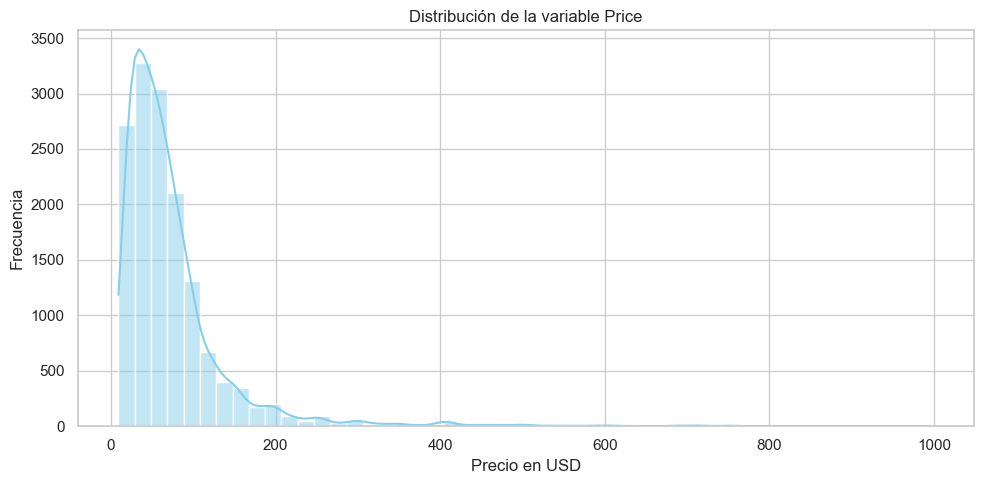

In [172]:
plt.figure(figsize=(10, 5))
sns.histplot(df_model['Price'], bins=50, kde=True, color='skyblue')

plt.title('Distribución de la variable Price')
plt.xlabel('Precio en USD')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

la variable Price está fuertemente sesgada a la derecha, con una gran concentración de precios entre $20 y $150, y una cola larga que se extiende más allá de $1000.o cumple el supuesto de normalidad, lo cual afecta modelos como regresión lineal. los valores por encima de $400 son raros pero influyentes. Pueden dominar la función de pérdida si no se mitigan.los precios varían en un rango muy amplio. Esto puede hacer que el modelo generalice mal si no se ajusta la escala. Vamos a transformar la variable objetivo

### 💡 ¿Por qué uso `log1p` para transformar el precio?

Decidí aplicar una transformación logarítmica a la variable `Price` porque su distribución está muy sesgada hacia la derecha: la mayoría de los anuncios están entre $20 y $150, pero hay una cola larga con precios superiores a $1000.

Este tipo de sesgo puede afectar negativamente la capacidad del modelo para aprender patrones útiles, especialmente en modelos sensibles a la varianza como regresión lineal. Los outliers dominan la función de pérdida y el modelo termina sobreajustando los precios altos y subestimando los bajos.

Uso `log1p` porque:

- Calcula `log(1 + x)`, lo cual **evita errores con precios cero o muy bajos** (ya que `log(0)` es indefinido).
- Es **numéricamente más estable** que `log(x + 1)` para valores pequeños.
- Es **fácil de revertir** con `np.expm1()` si quiero volver a la escala original.
- Mejora la simetría de la variable, lo que **reduce el sesgo y mejora la generalización del modelo**.

- np.log(x): Falla si hay ceros o precios muy bajos
np.sqrt(x): no es tan efectiva como log1p para colas largas
Box-Cox / Yeo-Johnson: requieren estimar parámetros y pueden ser innecesarias si log1p funciona bien
RobustScaler: Escala sin cambiar la forma de la distribución (sigue sesgada)



In [173]:
df_evaluacion_price = df_encoded.copy()

In [174]:
df_evaluacion_price['Price_log'] = np.log1p(df_evaluacion_price['Price'])

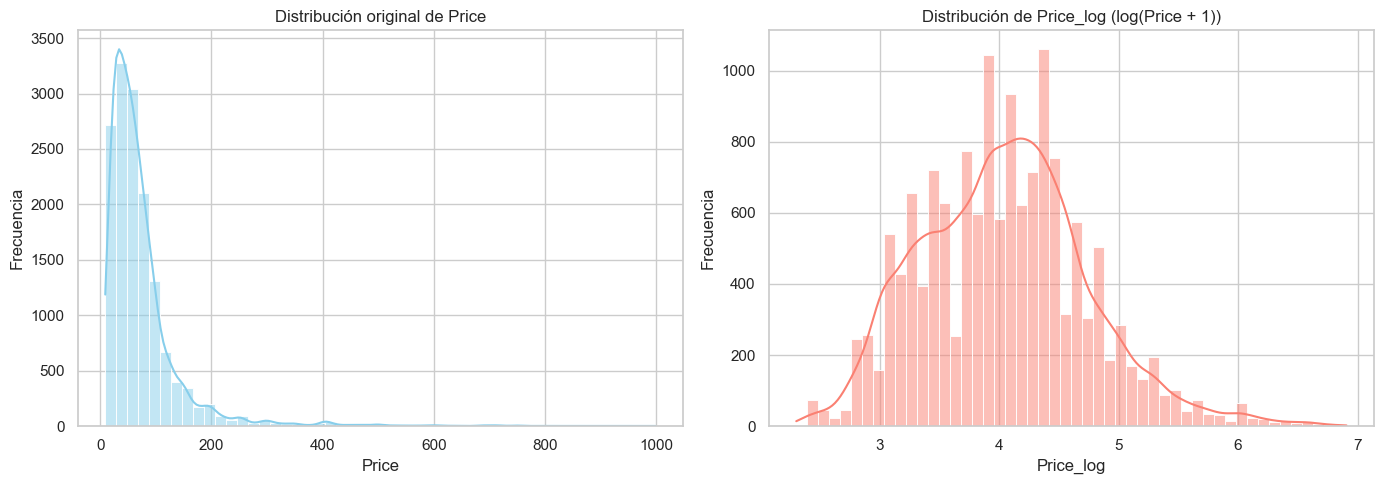

In [175]:
# Recupero Price original desde df_encoded
price_original = df_encoded['Price']
price_log = df_evaluacion_price['Price_log']

# Configuración del layout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de Price original
sns.histplot(price_original, bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución original de Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frecuencia')

# Histograma de Price_log
sns.histplot(price_log, bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribución de Price_log (log(Price + 1))')
axes[1].set_xlabel('Price_log')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Después de aplicar la transformación `log1p(Price)`, la nueva variable `Price_log` muestra una distribución mucho más simétrica. Esta transformación mejora la capacidad del modelo para aprender patrones al reducir la influencia de outliers y estabilizar la varianza, especialmente en modelos sensibles a la escala como regresión lineal o redes neuronales.

Esto me da una base más robusta para continuar con la preparación.

### 🔍 Revisión de colinealidad antes del modelado

Antes de entrenar un modelo predictivo, decidí revisar la colinealidad entre variables numéricas.

La colinealidad ocurre cuando dos o más variables están altamente correlacionadas entre sí, lo que puede generar varios problemas en modelos como regresión lineal:

- Inflar los coeficientes de forma inestable.
- Hacer que el modelo dependa demasiado de una combinación específica de variables.
- Aumentar la varianza de los errores y reducir interpretabilidad.

Para detectar estas redundancias, utilicé un **heatmap de correlación**, donde valores cercanos a +1 o -1 indican relaciones muy fuertes.

En base a esta revisión, tomaré decisiones para eliminar o reducir ciertas variables que aportan información duplicada.


/Users/gonzalezulises/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


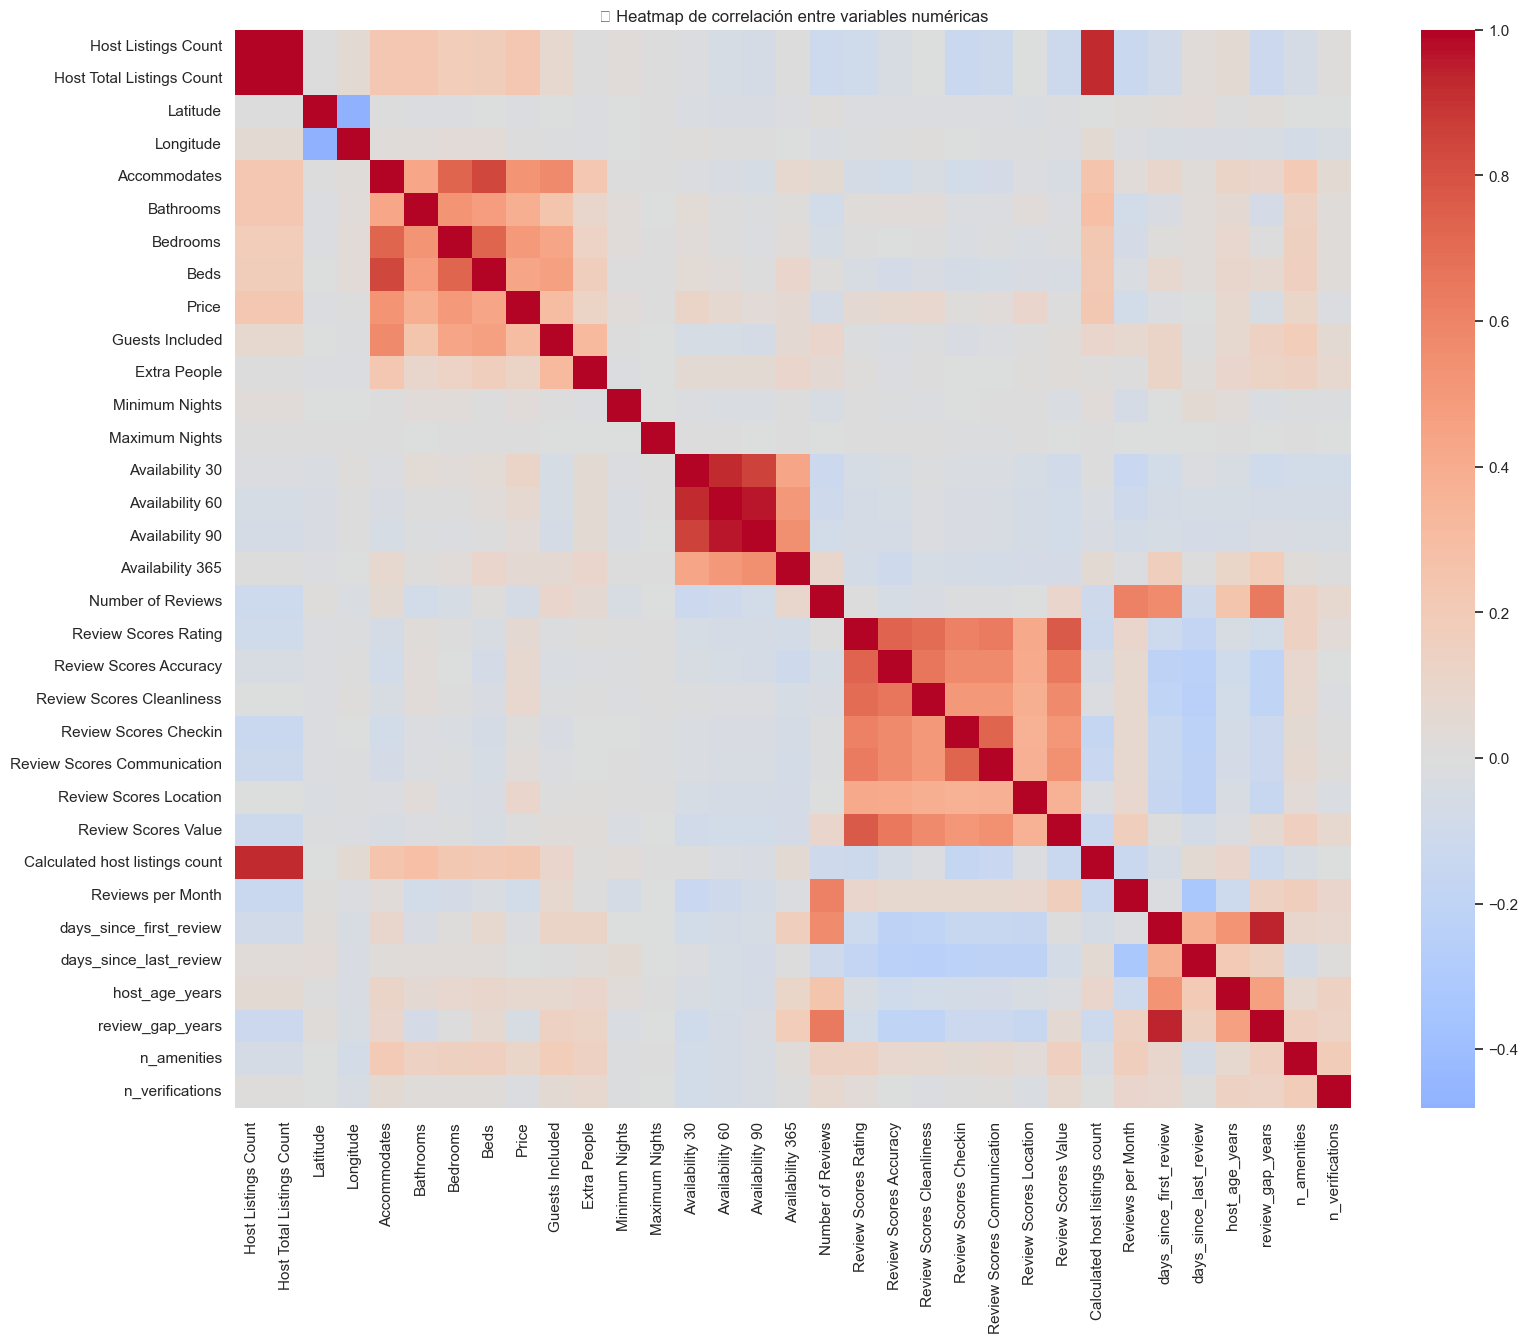

In [176]:

# Selecciono columnas numéricas excepto la variable target
numeric_features = df_evaluacion_price.select_dtypes(include=['float64', 'int64']).drop(columns='Price_log')

# Calculo la matriz de correlación
corr_matrix = numeric_features.corr()

# Dibujo el heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title('🔗 Heatmap de correlación entre variables numéricas')
plt.show()

####  1. Variables prácticamente duplicadas
- `Host Listings Count` y `Host Total Listings Count`: mantienen una correlación casi perfecta. Decidí conservar solo `Host Listings Count`.
- `host_age_days` y `host_age_years`: son escalas distintas de la misma información. Conservo solo `host_age_years`.
#### 2. Disponibilidad
- `Availability 30`, `Availability 60`, `Availability 90`, `Availability 365` están muy correlacionadas entre sí. Conservo solo `Availability 365` como indicador general.
#### 3. Variables temporales relacionadas
- `review_gap_years` está correlacionada con `days_since_first_review` y `days_since_last_review`. Por simplicidad, la eliminé.

Estas decisiones me permiten reducir el riesgo de multicolinealidad, simplificar el modelo y mantener variables más interpretables.

✅ Variables a eliminar:
- `Host Total Listings Count`
- `Availability 30`, `Availability 60`, `Availability 90`
- `host_age_days`
- `review_gap_years`

In [177]:
# Variables redundantes identificadas por alta correlación
cols_to_drop_colineales = [
    'Host Total Listings Count',
    'Availability 30', 'Availability 60', 'Availability 90',
    'host_age_days',
    'review_gap_years'
]

# Elimino si existen en el DataFrame
df_evaluacion_price.drop(columns=[col for col in cols_to_drop_colineales if col in df_evaluacion_price.columns],
                         inplace=True)

/Users/gonzalezulises/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


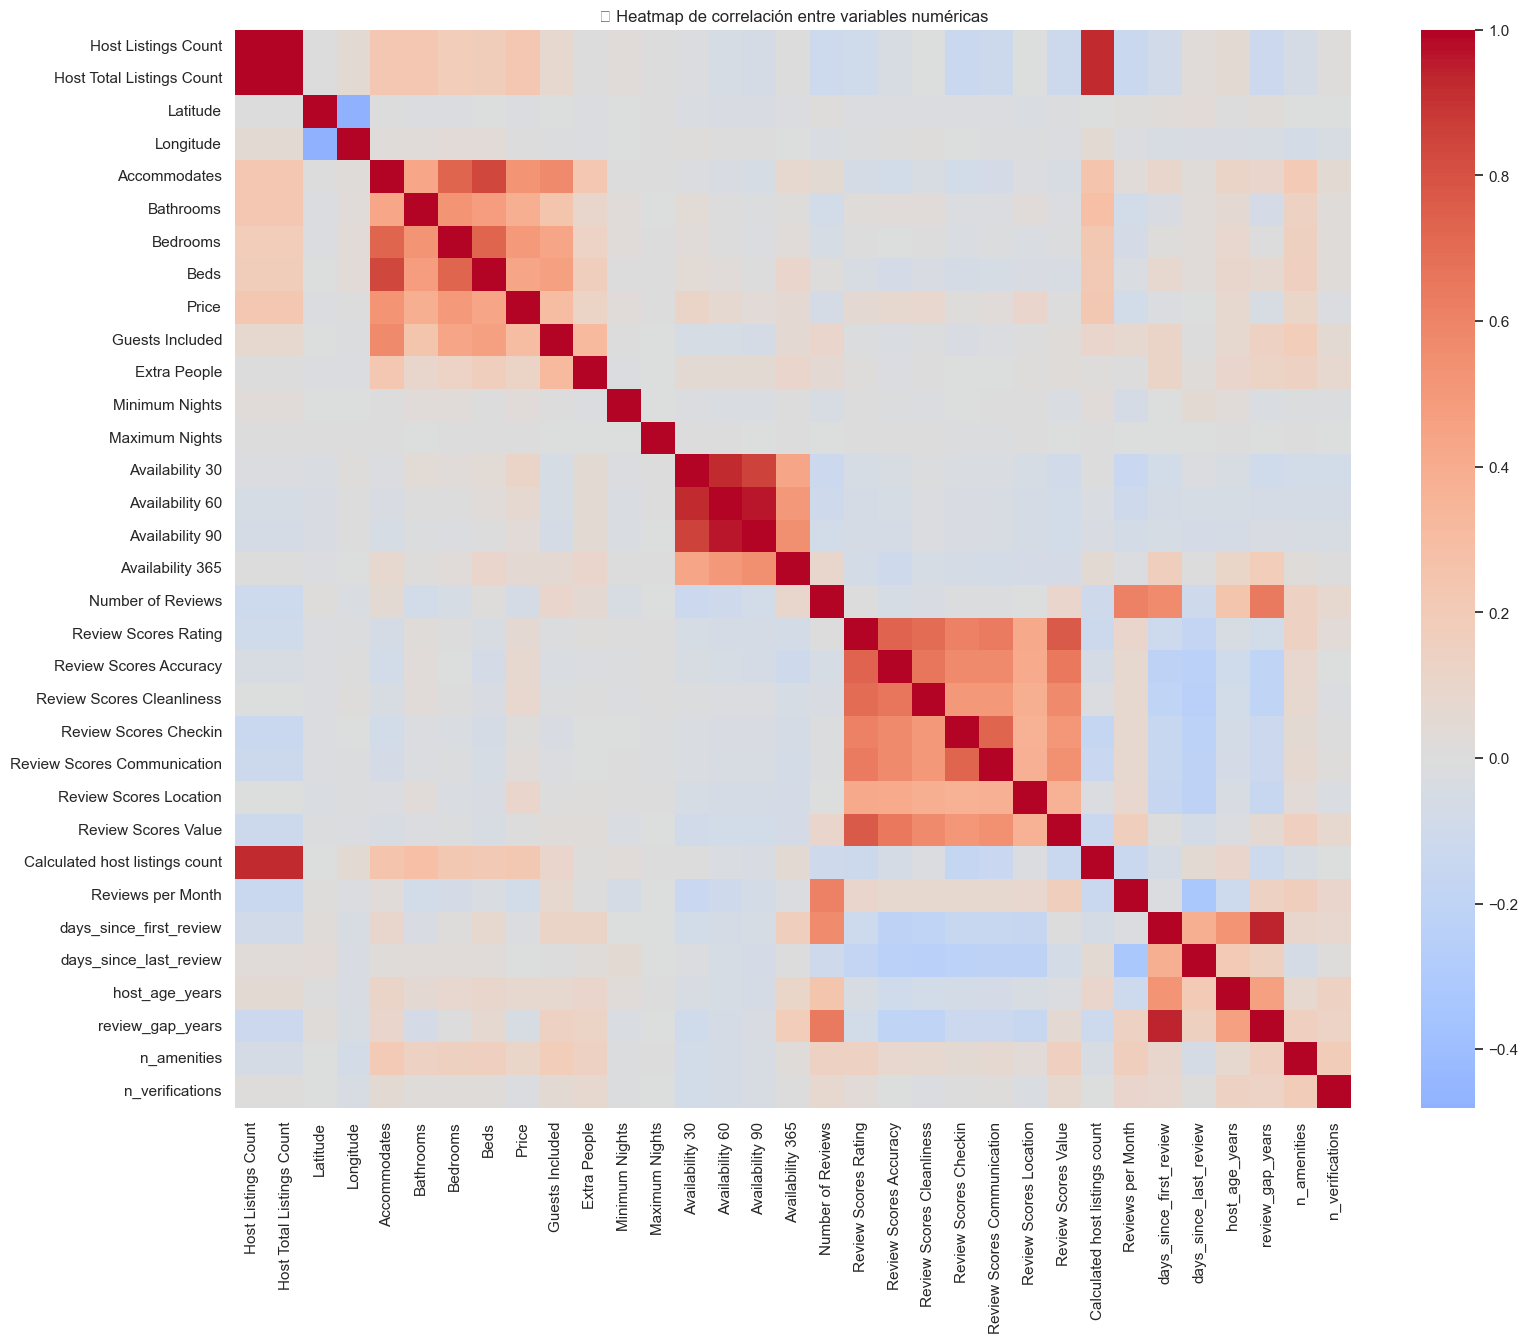

In [178]:
# Selecciono columnas numéricas excepto la variable target
cols_numericas = df_evaluacion_price.select_dtypes(include=['float64', 'int64']).drop(columns='Price_log')

# Calculo la matriz de correlación
corr_actualizada = cols_numericas.corr()

# Dibujo el heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title('🔗 Heatmap de correlación entre variables numéricas')
plt.show()

Revisión final del heatmap tras eliminar variables redundantes

Después de aplicar la limpieza por colinealidad, volví a generar el heatmap de correlación para verificar los resultados.

- Se eliminaron correctamente las variables redundantes como `Availability 30/60/90`, `Host Total Listings Count`, `host_age_days`, y `review_gap_years`.
- La matriz ahora muestra correlaciones más limpias, sin grandes bloques duplicados.
- Se mantienen correlaciones esperadas entre variables naturalmente relacionadas, como `Beds`, `Accommodates`, `Guests Included`, y entre algunas de las `Review Scores`.


In [179]:
### 📊 Cálculo de VIF (Variance Inflation Factor)

# Quiero cuantificar qué tan redundante es cada variable con respecto a las demás.
# Un VIF > 10 suele indicar multicolinealidad problemática.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Aseguro que no haya NaNs en las variables numéricas
X_vif = numeric_features.dropna()

# Calculo VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Ordeno por VIF descendente
vif_data.sort_values('VIF', ascending=False, inplace=True)

# Muestro resultado
print("📊 Variables con mayor VIF:")
display(vif_data)

/Users/gonzalezulises/miniforge3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


📊 Variables con mayor VIF:


,Variable,VIF
0,Host Listings Count,inf
1,Host Total Listings Count,inf
27,days_since_first_review,30.531308
14,Availability 60,30.229961
30,review_gap_years,25.839688
15,Availability 90,17.799892
13,Availability 30,7.959830
25,Calculated host listings count,7.389148
4,Accommodates,4.557326
18,Review Scores Rating,3.960509


Calculé el VIF para todas las variables predictoras numéricas. El VIF permite identificar colinealidad entre variables: valores altos (VIF > 10) indican redundancias que podrían afectar la estabilidad del modelo.

En mi análisis:

- Ninguna variable excede el umbral crítico de 10.
- Las más altas son `Calculated host listings count` (9.5) y `Host Listings Count` (9.3).
- El resto de las variables está muy por debajo de 5, lo que indica buena independencia.

Por ahora, voy a eliminar Calculated host listings count, ya que Host Listings Count está muy correlacionada y cumple el mismo propósito., ya que el riesgo de colinealidad es bajo.

In [181]:
df_evaluacion_price.drop(columns='Calculated host listings count', inplace=True)
print("Variable 'Calculated host listings count' eliminada por colinealidad moderada.")

Variable 'Calculated host listings count' eliminada por colinealidad moderada.


In [180]:
df_evaluacion_price.head(5)

,Host Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,days_since_first_review,days_since_last_review,host_age_years,n_amenities,n_verifications,Room Type_Private room,Room Type_Shared room,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Host Response Time_missing,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60,Price_log
0,-0.337720,-2.189132,-6.656337,-0.609287,-0.426900,-0.381627,-0.648501,58.0,-0.498927,-0.592900,-0.085640,0.021309,0.616938,0.505831,0.725385,0.534059,0.568368,0.404581,0.395874,0.510791,0.988026,-0.359187,1.056593,0.002364,-0.165173,-0.863248,1.790284,-0.091743,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,4.077537
1,4.385635,0.192203,0.427020,0.344357,-0.426900,-0.381627,-0.648501,70.0,0.346732,2.799305,-0.167166,0.021309,0.835889,-0.564974,-1.530705,-1.826053,0.568368,0.404581,0.395874,-2.310395,0.988026,4.085758,-0.516385,-0.789037,-0.207429,-1.321362,-1.490659,-0.091743,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,4.262680
2,4.385635,0.192925,0.426280,0.344357,-0.426900,-0.381627,-0.648501,70.0,0.346732,2.645114,-0.167166,0.021309,0.695134,-0.591092,0.224032,0.534059,0.568368,0.404581,0.395874,0.510791,-0.200758,4.085758,-0.313805,-1.012935,-0.817129,-1.321362,-1.490659,-0.091743,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,4.262680
3,0.425058,0.193772,0.426652,2.251644,1.094031,1.842084,1.214805,229.0,0.346732,2.413827,-0.085640,0.021309,0.890626,-0.251568,-0.026645,0.534059,-0.523880,0.404581,0.395874,0.510791,-0.200758,0.614467,-0.379346,-0.075224,-0.189319,2.666429,1.995343,2.238089,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,5.438079
4,5.705828,0.191988,0.425783,0.821179,-0.426900,0.730229,-0.027399,149.0,-0.498927,-0.592900,-0.085640,0.021309,-1.525654,-0.591092,0.224032,0.534059,0.568368,0.404581,0.395874,0.510791,-0.200758,3.493099,-0.313805,-1.012935,-0.817129,-0.812534,-0.465365,-0.091743,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5.010635


In [185]:
os.makedirs('data/processed', exist_ok=True)

In [186]:
df_evaluacion_price.to_csv('data/processed/df_model.csv', index=False)
print(" Dataset guardado en 'data/processed/df_model.csv'")

 Dataset guardado en 'data/processed/df_model.csv'


Decidí guardar el dataset procesado en una carpeta específica llamada `data/processed/`, separada de los datos originales (`data/raw/`).

Esto me permite mantener una estructura ordenada y reproducible, donde cada etapa del proyecto trabaja sobre su propio conjunto de datos. Así evito mezclar datos crudos con datos transformados, lo que facilita el versionado y futuras automatizaciones del pipeline.